### *"Courage is NOT having the strength to go on; it is going on when you don't have the strength."*
*-Theodore Roosevelt*

So be courageous! Tackle this HW!

----

### YOUR NAME HERE:  Zach Broomall

#### List the names of anyone you helped here: XXXX

#### List the names of anyone who helped you here: XXXX

---

### Don't forget to use your SQL Lab notes! 

If you haven't been taking them, this HW may help you realize why they are important.

----

# HW SQL 4: Select Statements

## Create the SQLite database from a csv 


Remember: To use SQLite, we need to import some special packages and to create a database (db) file from a csv file.

### !!!!!!!!!!!!!!!!!!!!!!So please run the cells below!!!!!!!!!!!!!!!!!!!!

In [1]:
#This cell imports the SQLite package and 2 other packages that allow us to manipulate tables of data.

import pandas as pd   
import numpy as np   
import matplotlib.pyplot as plt
import sqlite3 as sql     

First we will read in a csv file as usual, create/connect to a database, and transform the csv file into the database.

**Read through the code comments below so you have an idea of what's going on.  Then run the code in the cell.**

In [2]:
#Read in a csv with the weather data
weather = pd.read_csv('weather.csv')

#Make a connection to a database file ('hearts_on_fire.db'). 
#If the file does not yet exist, it will be created.  
conn = sql.connect('weather.db')

#The to_sql method writes records stored in a DataFrame (table) to a SQLite database.
#It requires 2 inputs to run:
#     the name of TABLE inside the database file
#     and a connection to the database where the table lives.
#So essentially, the code below dumps the contents of the hearts_on_fire dataframe 
#     into a table called weather in a hearts_on_fire.db file.

try:
    weather.to_sql('weather', conn, index = False)
except ValueError: 
    print("""Dr. R Note: A ValueError occurred. That's probably fine and likely just means
           that you've run this cell twice and you're getting an error
           because the DB is already created.  :) """)

----

## Understanding the Data

The  ``weather`` table contains about 62 years worth of temperature, rainfall and sunshine data for the city of London.

There is a record/row for each year/month from Jan 1957 to April 2019.  

* T_high:  The highest temp recorded for the month (celsius)
* T_low:  The lowest temp recorded for the month (celsius)
* Rain: the rainfall is the total amout of rain *for the month* in millimeters
* Sun : the total number of hours sunshine *for the month*.

In [3]:
#Create the sql statement
sql_statement = """SELECT *
                   FROM weather"""

#Run the query, passing it and the connection (conn) into the needed method.
#You get a dataframe with the results of the query.
weather_results = pd.read_sql_query(sql_statement, conn)

#Print the dataframe results.
weather_results

,Year,Month,T_high,T_low,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...
743,2018,12,10.7,5.2,60.6,40.3
744,2019,1,7.6,2.0,33.2,56.4
745,2019,2,12.4,3.3,34.2,120.2
746,2019,3,13.1,5.8,49.6,119.0


### Question 1.

Select all rows/columns where T_high is at least 25 degrees celsius (which is 77 degrees F).  

HINT:  There will be 17 rows.

In [4]:
sql_statement1 = """SELECT T_high
                    FROM weather
                    WHERE T_high >= 25"""

weather_results1 = pd.read_sql_query(sql_statement1, conn)
weather_results1

,T_high
0,25.9
1,25.5
2,26.6
3,25.1
4,27.6
5,25.8
6,26.0
7,26.2
8,26.3
9,27.0


### Question 2.

Find the years where the temperature in July stayed strictly between 13 and 22 degrees C (so about 55-72 degrees F).  Report only the Year, T_high, and T_low.

The answer will be as below.

| Year | T_high | T_low |
|:----:|:----:|:----:|
| 1987 | 21.8 | 13.2 |
| 2007 | 21.4 | 13.1 |
| 2012 | 21.3 | 13.2 |

In [5]:
sql_statement2 = """SELECT Year, T_high, T_low
                    FROM weather
                    WHERE Month = 7 AND 
                    T_high < 22 AND T_low > 13"""

weather_results2 = pd.read_sql_query(sql_statement2, conn)
weather_results2 

,Year,T_high,T_low
0,1987,21.8,13.2
1,2007,21.4,13.1
2,2012,21.3,13.2


### Question 3.

Select all the rows where the year is a multiple of 10.  Include only the Year, Month, and Rain columns and show the results in order of the largest Rain to the smallest.

HINTS:  
* The result should be a 72 row X 3 column table.
* The first row should be Oct 1960 with a Rain of 155.5 mm

In [6]:
sql_statement3 = """SELECT Year, Month, Rain
                    FROM weather
                    WHERE Year % 10 == 0
                    ORDER BY Rain DESC"""

weather_results3 = pd.read_sql_query(sql_statement3, conn)
weather_results3 

,Year,Month,Rain
0,1960,10,155.5
1,2000,10,155.4
2,1970,11,151.2
3,1980,6,106.2
4,2000,9,105.8
...,...,...,...
67,2010,6,12.4
68,1970,10,10.4
69,1990,3,6.9
70,1990,7,6.9


----
### Question 4.

Find the max recorded temperature for any month in the database.

HINT:  Your table should be a 1 row X 1 col table containing 28.3.

In [7]:
sql_statement4 = """SELECT MAX(T_high)
                    FROM weather
                    """

weather_results4 = pd.read_sql_query(sql_statement4, conn)
weather_results4

,MAX(T_high)
0,28.3


----
### Question 5.

Find the Year and month with the max temperature in the database.  

The answer should look like the following.

| Year | Month | Max_All_Temps |
|:----:|:-----:|:-------------:|
| 2018 |   7   |      28.3     |

In [8]:
sql_statement5 = """SELECT Year, Month, MAX(T_high)
                    FROM weather"""

weather_results5 = pd.read_sql_query(sql_statement5, conn)
weather_results5

,Year,Month,MAX(T_high)
0,2018,7,28.3


----
### Question 6.

A) Find the maximum/minimum/average number of hours per day of sun light in London for the winter months (Dec-Feb like us). Rename your columns so your answer looks just like mine.

|   | MAX_SUN_PER_DAY_WINTER | MIN_SUN_PER_DAY_WINTER | AVG_SUN_PER_DAY_WINTER |
|--:|-----------------------:|-----------------------:|-----------------------:|
| 0 |               4.333333 |               0.616667 |               1.948209 |

In [9]:
sql_statement6 = """SELECT MAX(Sun)/30 AS MAX_SUN_PER_DAY_WINTER, 
                    MIN(Sun)/30 AS MIN_SUN_PER_DAY_WINTER, 
                    AVG(Sun)/30 AS AVG_SUN_PER_DAY_WINTER
                    FROM weather
                    WHERE Month IN (1, 2, 12)"""

weather_results6 = pd.read_sql_query(sql_statement6, conn)
weather_results6

,MAX_SUN_PER_DAY_WINTER,MIN_SUN_PER_DAY_WINTER,AVG_SUN_PER_DAY_WINTER
0,4.333333,0.616667,1.948209


B) Now find the maximum/minimum/average number of hours per day of sun light in London for the summer months (June-August like us). Your columns should look just like mine.

|   | MAX_SUN_PER_DAY_SUMMER | MIN_SUN_PER_DAY_SUMMER | AVG_SUN_PER_DAY_SUMMER |
|--:|-----------------------:|-----------------------:|-----------------------:|
| 0 |               9.843333 |                   3.39 |               6.538996 |

In [10]:
sql_statement6b = """SELECT MAX(Sun)/30 AS MAX_SUN_PER_DAY_WINTER, 
                    MIN(Sun)/30 AS MIN_SUN_PER_DAY_WINTER, 
                    AVG(Sun)/30 AS AVG_SUN_PER_DAY_WINTER
                    FROM weather
                    WHERE Month IN (6, 7, 8)"""

weather_results6b = pd.read_sql_query(sql_statement6b, conn)
weather_results6b

,MAX_SUN_PER_DAY_WINTER,MIN_SUN_PER_DAY_WINTER,AVG_SUN_PER_DAY_WINTER
0,9.843333,3.39,6.538996


C) What do you learn from parts A and B?  Does this feel consistent with your life in the USA?

*Between the two parts we learn in London no matter if its Summer or Winter there is not sunlight for more than half a day. I feel this is different from us In the US becasue we get lots more sun during the day and night depending on the time of year. *

----
### Question 7.

Give a table without repeats of just the months where the max temperature was *above 25 degrees celsius* (so above 77 degrees F).  Sort your data so that the months go from smallest to largst.

HInts:
* Your table should have one column that has only...
* ...the summer months, as expected.

In [11]:
sql_statement7 = """SELECT T_high
                    FROM weather
                    WHERE T_high > 25
                    ORDER BY Month"""

weather_results7 = pd.read_sql_query(sql_statement7, conn)
weather_results7

,T_high
0,25.5
1,26.6
2,27.6
3,25.8
4,26.2
5,26.3
6,28.2
7,27.0
8,25.8
9,28.3


----
### Question 8.

Eventually we will mix queries with plotting to continue to create good visualiations.

A. Find the max temperatures during July for each year in the DB.  Only show the Year and T_high columns.

HINT:  You should get a 62 row X 2 column table.

In [12]:
sql_statement8 = """SELECT Year, T_high
                    FROM weather
                    WHERE Month = 7"""

weather_results8 = pd.read_sql_query(sql_statement8, conn)
weather_results8

,Year,T_high
0,1957,22.5
1,1958,21.7
2,1959,24.7
3,1960,20.1
4,1961,22.1
...,...,...
57,2014,25.8
58,2015,23.7
59,2016,24.0
60,2017,23.8


B.  Replace the two strings that start eith "replace" to generate a line graph with weather_results data frame from A.  Your goal is to plot Year on the x axis and max temp on the y axis.

Text(0, 0.5, 'Max Temp In July')

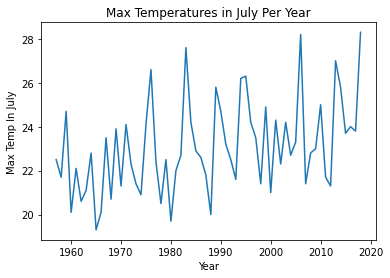

In [13]:
plt.plot(weather_results8['Year'],
         weather_results8['T_high'])
plt.title('Max Temperatures in July Per Year')
plt.xlabel('Year')
plt.ylabel('Max Temp In July')

C.  Write a sentence about what you learn from the graph.

*We learn from the graph that as the month of July is sparatic with no easy average. But has a slight increase as the years go on. *

---

### Question 9.

Except for 2019, there are 12 rows per year in the weather data beacuse we have monthly weather measurements.  

Find the average rainfall per year, except for 2019.

So your final answer will be as follows.

| Year | AVG(Rain) |
|:----:|:---------:|
| 1957 | 46.466667 |
| 1958 | 61.641667 |
| 1959 | 40.608333 |
| 1960 | 61.283333 |
| 1961 | 46.566667 |
|  ... |    ...    |
| 2014 | 72.000000 |
| 2015 | 46.833333 |
| 2016 | 49.216667 |
| 2017 | 47.683333 |
| 2018 | 48.333333 |

In [14]:
sql_statement9 = """SELECT Year, AVG(Rain)
                    FROM weather
                    WHERE Year != 2019
                    GROUP BY Year"""

weather_results9 = pd.read_sql_query(sql_statement9, conn)
weather_results9

,Year,AVG(Rain)
0,1957,46.466667
1,1958,61.641667
2,1959,40.608333
3,1960,61.283333
4,1961,46.566667
...,...,...
57,2014,72.000000
58,2015,46.833333
59,2016,49.216667
60,2017,47.683333


### Question 10.

Select all the rows where the T_low and T_high are within 4.5 degrees celsius of each other.  Show the Year, Month, Tmin, and Tmax.

HINTS:  
* The result should be a 7 row X 4 column table.
* The first row should be Jan 1966 with a T_low of 1.0 degree celsius and a T_high of 5.3 degrees celsius

In [15]:
sql_statement10 = """ SELECT Year, Month, T_low, T_high
                      FROM weather
                      WHERE T_high - T_low <= 4.5"""

weather_results10 = pd.read_sql_query(sql_statement10, conn)
weather_results10 

,Year,Month,T_low,T_high
0,1966,1,1.0,5.3
1,1968,12,1.0,5.4
2,1986,2,-2.7,1.7
3,1996,1,3.1,7.2
4,2000,12,4.6,9.0
5,2002,12,5.2,9.0
6,2013,1,2.0,6.5


----
### Question 11.

*Without hardcoding*, select only the years and months that are within 3 degrees of the MIN temperature in the DB.  
 
 HINTS: 
* ```SElECT A-10 FROM....``` returns all the values in the column A reduced by 10.
*  The answer  is as follows.

| Year | Month |
|:----:|:-----:|
| 1963 |   1   |
| 1963 |   2   |
| 1979 |   1   |
| 1985 |   1   |
| 1986 |   2   |

In [20]:
sql_statement11 = """ SELECT Year, Month
                      FROM weather
                      WHERE T_low <= -1.6  """

weather_results11 = pd.read_sql_query(sql_statement11, conn)
weather_results11

,Year,Month
0,1963,1
1,1963,2
2,1979,1
3,1985,1
4,1986,2


----

There are a few problems left to do, but we're gonna switch to a different database.  So let's close the one we've been working with.

----

### Closing the DB connection.

Throughout this whole file, we've kept our connection to the Datbase (the weather.db file) open.  

We must close the connection when done.

Run the following cell when you are done working on this HW.


In [21]:
conn.close()

Now try running a select statement.  Since the database has been closed, you will see an error.  Specifically, you will see  this error: "ProgrammingError: Cannot operate on a closed database."

In [22]:
#Create the sql statement
sql_statement = """SELECT *
                   FROM weather"""

#Run the query, passing it and the connection (conn) into the needed method.
#You get a dataframe with the results of the query.
weather_results = pd.read_sql_query(sql_statement, conn)

#Print the dataframe results.
weather_results

ProgrammingError: ignored

----

### NBA Salaries

Now we'll import the NBA Salaries from the 2015-2016 season for a few more practice problems.

In [23]:
#Read in a csv  
nba = pd.read_csv('nba_salaries.csv')

#Make a connection to a database file ('nba.db'). 
#If the file does not yet exist, it will be created.  
conn = sql.connect('nba.db')

#The to_sql method writes records stored in a DataFrame (table) to a SQLite database.
#It requires 2 inputs to run:
#     the name of TABLE inside the database file
#     and a connection to the database where the table lives.
#So essentially, the code below dumps the contents of the hearts_on_fire dataframe 
#     into a table called weather in a nba.db file.

try:
    nba.to_sql('nba', conn, index = False)
except ValueError: 
    print("""Dr. R Note: A ValueError occurred. That's probably fine and likely just means
           that you've run this cell twice and you're getting an error
           because the DB is already created.  :) """)

To give you some  background: "The NBA is the highest paying professional sports league in the world," [reported CNN](http://edition.cnn.com/2015/12/04/sport/gallery/highest-paid-nba-players/) in March 2016. The table `nba` contains the salaries of all National Basketball Association players in 2015-2016.

Each row represents one player. The columns are:

| Column Label   | Description                                         |
|--------------------|-----------------------------------------------------|
| `player`           | Player's name                                       |
| `position`         | Player's position on team                           |
| `team`             | Team name                                           |
|`salary`    | Player's salary in 2015-2016, in millions of dollars|
 
The code for the positions is PG (Point Guard), SG (Shooting Guard), PF (Power Forward), SF (Small Forward), and C (Center). But what follows doesn't involve details about how basketball is played.

The first row shows that Paul Millsap, Power Forward for the Atlanta Hawks, had a salary of almost $\$18.7$ million in 2015-2016.

Let's select everything form the table, so you can visualize the table.

In [24]:
sql_statement = """SELECT *
                   FROM nba"""

nba_results = pd.read_sql_query(sql_statement, conn)
nba_results

,player,position,team,salary
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...
412,Gary Neal,PG,Washington Wizards,2.139000
413,DeJuan Blair,C,Washington Wizards,2.000000
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,Garrett Temple,SG,Washington Wizards,1.100602


----

### Question 12.

Select all teams with 3 words in their team name.  

HINT:  
* Use LIKE.
* Answer: A table that is 110 rows X 5 columns



In [27]:
sql_statement12 = """SELECT *
                     FROM nba
                     WHERE team LIKE '% % %'"""

nba_results12 = pd.read_sql_query(sql_statement12, conn)
nba_results12


,player,position,team,salary
0,Klay Thompson,SG,Golden State Warriors,15.501000
1,Draymond Green,PF,Golden State Warriors,14.260870
2,Andrew Bogut,C,Golden State Warriors,13.800000
3,Andre Iguodala,SF,Golden State Warriors,11.710456
4,Stephen Curry,PG,Golden State Warriors,11.370786
...,...,...,...,...
105,David West,PF,San Antonio Spurs,1.499187
106,Boban Marjanovic,C,San Antonio Spurs,1.200000
107,Reggie Williams,SF,San Antonio Spurs,1.185784
108,Kyle Anderson,SF,San Antonio Spurs,1.142880


----
### Question 13.

Select a list of positions in the table.  Each position should be listed exactly once.

In [29]:
sql_statement13 = """ SELECT position
                      FROM nba
                      GROUP BY position"""

nba_results13 = pd.read_sql_query(sql_statement13, conn)
nba_results13


,position
0,C
1,PF
2,PG
3,SF
4,SG


----
### Question 14.

Verify that Kentavious Caldwell-Pope has the longest name of the nba players by creating this table, exactly.  

The table should be sorted and have the same column names.

| player |              NUM_LETTERS |     |
|-------:|-------------------------:|-----|
|      0 | Kentavious Caldwell-Pope |  24 |
|      1 |  Rondae Hollis-Jefferson |  23 |
|      2 |  Michael Carter-Williams |  23 |
|      3 |   Michael Kidd-Gilchrist |  22 |
|      4 |   Thanasis Antetokounmpo |  22 |
|    ... |                      ... | ... |
|    412 |                John Wall |   9 |
|    413 |                Gary Neal |   9 |
|    414 |                 Alex Len |   8 |
|    415 |                 Ed Davis |   8 |
|    416 |                 Rudy Gay |   8 |

In [41]:
sql_statement14 = """ SELECT player, length(player) AS NUM_LETTERS
                      FROM nba
                      ORDER BY NUM_LETTERS DESC """

nba_results14 = pd.read_sql_query(sql_statement14, conn)
nba_results14


,player,NUM_LETTERS
0,Kentavious Caldwell-Pope,24
1,Rondae Hollis-Jefferson,23
2,Michael Carter-Williams,23
3,Michael Kidd-Gilchrist,22
4,Thanasis Antetokounmpo,22
...,...,...
412,John Wall,9
413,Gary Neal,9
414,Alex Len,8
415,Ed Davis,8


----
### Question 15.

Without hardcoding, find the names and salaries of any players on The 76ers who make no less than Nik Stauskas.

The answer is:

|     player     |   salary  |
|:--------------:|:---------:|
| Gerald Wallace | 10.105855 |
|   Carl Landry  |  6.500000 |
|   Joel Embiid  |  4.626960 |
|  Jahlil Okafor |  4.582680 |
|  Nerlens Noel  |  3.457800 |
|  Nik Stauskas  |  2.869440 |

In [35]:
sql_statement15 = """ SELECT player, salary
                      FROM nba
                      WHERE team = 'Philadelphia 76ers' 
                      AND salary >= (SELECT salary
                                    FROM nba
                                    WHERE player = 'Nik Stauskas')"""

nba_results15 = pd.read_sql_query(sql_statement15, conn)
nba_results15


,player,salary
0,Gerald Wallace,10.105855
1,Carl Landry,6.500000
2,Joel Embiid,4.626960
3,Jahlil Okafor,4.582680
4,Nerlens Noel,3.457800
5,Nik Stauskas,2.869440


----
### Question 17.
 

Below, write the code to close the nba database.

Hint:  We never opened a cursor this time.  Just a connection.

In [42]:
#Code to close the nba connection here

---

### Question 18.

Did you follow the conventions expected?  For this question I will give/takeaway points for doing so.

*Yes*

---

Please save this file and submit!  Good job!